# Process data

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import random
import glob
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *

from numpy.random import seed
randomState = 123
seed(randomState)

/home/alexandra/anaconda3/envs/Pa/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/alexandra/anaconda3/envs/Pa/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/alexandra/anaconda3/envs/Pa/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data

Data downloaded from ADAGE repository [ADAGE](https://github.com/greenelab/adage).  

*data*
1. Raw data was downloaded from ArrayExpress
2. Use [RMA](https://www.rdocumentation.org/packages/affy/versions/1.50.0/topics/rma) bioconductor library to convert raw array data to log 2 gene expression data that has been quantile normalized.
3. Only keep PA genes, remove control genes

*normalized_data*
1. Use data from above
2. Normalize each gene to be between 0 and 1

In [2]:
# Load arguments
data_file = os.path.join(os.path.dirname(os.getcwd()), "data", "Pa_compendium_02.22.2014.pcl")
normalized_data_file = os.path.join(os.path.dirname(os.getcwd()), "data", "train_set_normalized.pcl")
metadata_file = os.path.join(os.path.dirname(os.getcwd()), "metadata", "sample_annotations.tsv")

In [3]:
# Read in data
data = pd.read_table(data_file, header=0, sep='\t', index_col=0).T
data.head(5)

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
05_PA14000-4-2_5-10-07_S2.CEL,9.620090,10.575783,9.296287,9.870074,8.512268,7.903954,7.039473,10.209826,9.784684,5.485688,...,7.740609,9.730384,10.516061,10.639916,9.746849,5.768592,9.224442,11.512176,12.529719,11.804896
54375-4-05.CEL,9.327996,10.781977,9.169988,10.269239,7.237999,7.663758,6.855194,9.631573,9.404465,5.684067,...,7.127736,9.687607,10.199612,9.457152,9.318372,5.523898,7.911031,10.828271,11.597643,11.268520
AKGlu_plus_nt_7-8-09_s1.CEL,9.368599,10.596248,9.714517,9.487155,7.804147,7.681754,6.714411,9.497601,9.523126,5.766331,...,7.343241,9.717993,10.419979,10.164667,10.305005,5.806817,8.575730,10.858250,12.255953,11.309662
anaerobic_NO3_1.CEL,9.083292,9.897050,8.068471,7.310218,6.723634,7.141148,8.492302,7.740717,7.640251,5.267993,...,7.374740,8.287819,9.437053,8.936576,9.418147,5.956482,7.481406,7.687985,9.205525,9.395773
anaerobic_NO3_2.CEL,8.854901,9.931392,8.167126,7.526595,6.864015,7.154523,8.492109,7.716687,7.268094,5.427256,...,7.425398,8.588969,9.313851,8.684602,9.272818,5.729479,7.699086,7.414436,9.363494,9.424762


In [4]:
# Read in data
normalized_data = pd.read_table(normalized_data_file, header=0, sep='\t', index_col=0).T
normalized_data.head(5)

Gene_symbol,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
05_PA14000-4-2_5-10-07_S2.CEL,0.853357,0.725280,0.640617,0.811465,0.694460,0.533958,0.158865,0.889579,0.884945,0.176558,...,0.466871,0.702785,0.790965,0.893249,0.789939,0.164157,0.970470,0.887472,0.900484,0.880012
54375-4-05.CEL,0.778790,0.767873,0.614859,0.907865,0.398800,0.460849,0.113876,0.761351,0.801740,0.222709,...,0.352020,0.694387,0.733186,0.639074,0.681204,0.110301,0.619554,0.747656,0.749893,0.805374
AKGlu_plus_nt_7-8-09_s1.CEL,0.789155,0.729508,0.725913,0.718989,0.530160,0.466327,0.079507,0.731643,0.827707,0.241847,...,0.392405,0.700352,0.773422,0.791118,0.931585,0.172570,0.797148,0.753785,0.856253,0.811099
anaerobic_NO3_1.CEL,0.716320,0.585079,0.390211,0.193248,0.279456,0.301781,0.513547,0.342051,0.415668,0.125914,...,0.398308,0.419574,0.593955,0.527203,0.706524,0.205510,0.504767,0.105662,0.363409,0.544780
anaerobic_NO3_2.CEL,0.658015,0.592172,0.410331,0.245504,0.312028,0.305852,0.513499,0.336723,0.334226,0.162965,...,0.407801,0.478697,0.571460,0.473054,0.669643,0.155548,0.562927,0.049738,0.388931,0.548814


In [5]:
# Read in metadata
metadata = pd.read_table(metadata_file, header=0, sep='\t', index_col='ml_data_source')
metadata

,experiment,sample_name,description,nucleic_acid,medium,genotype,od,growth_setting_1,growth_setting_2,strain,temperature,treatment,additional_notes,variant_phenotype,abx_marker,biotic_int_lv_2,biotic_int_lv_1
ml_data_source,,,,,,,,,,,,,,,,,
GSM1141730_PA01_ZnO_PZO_.CEL,E-GEOD-46947,GSM1141730 1,Pseudomonas aeruginosa PAO1 LB aerated 5 h wi...,RNA,LB,NaN,NaN,planktonic,aerated,PAO1,37.0,1 mM ZnO nanoparticles,Grown for 5h,NaN,NaN,NaN,NaN
GSM1141729_PA01_none_PC_.CEL,E-GEOD-46947,GSM1141729 1,Pseudomonas aeruginosa PAO1 LB aerated 5 h,RNA,LB,NaN,NaN,planktonic,aerated,PAO1,37.0,NaN,Grown for 5h,NaN,NaN,NaN,NaN
GSM1608059_Planktonic_1.CEL,E-GEOD-65882,GSM1608059 1,PAO1 WT. Planktonic. Rep1,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN
GSM1608060_Planktonic_2.CEL,E-GEOD-65882,GSM1608060 1,PAO1 WT. Planktonic. Rep2,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN
GSM1608061_Planktonic_3.CEL,E-GEOD-65882,GSM1608061 1,PAO1 WT. Planktonic. Rep3,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN
GSM1608062_Planktonic_4.CEL,E-GEOD-65882,GSM1608062 1,PAO1 WT. Planktonic. Rep4,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN
GSM1608067_Biofilm+12hrcipro_rep1.CEL,E-GEOD-65882,GSM1608067 1,"P. aeruginosa PAO1, cells grown 72 hours in a ...",RNA,PBM supplemented with 0.2 g/L glucose,WT,NaN,Biofilm,drip-flow biofilm reactor,PAO1,37.0,12h treatment with ciprofloxacin at 1.0 μg/ml,12 hours; stainless steel slides; 10o incline;...,NaN,NaN,NaN,NaN
GSM1608068_Biofilm+12hrcipro_rep2.CEL,E-GEOD-65882,GSM1608068 1,"P. aeruginosa PAO1, cells grown 72 hours in a ...",RNA,PBM supplemented with 0.2 g/L glucose,WT,NaN,Biofilm,drip-flow biofilm reactor,PAO1,37.0,12h treatment with ciprofloxacin at 1.0 μg/ml,12 hours; stainless steel slides; 10o incline;...,NaN,NaN,NaN,NaN
GSM1608069_Biofilm+12hrcipro_rep3.CEL,E-GEOD-65882,GSM1608069 1,"P. aeruginosa PAO1, cells grown 72 hours in a ...",RNA,PBM supplemented with 0.2 g/L glucose,WT,NaN,Biofilm,drip-flow biofilm reactor,PAO1,37.0,12h treatment with ciprofloxacin at 1.0 μg/ml,12 hours; stainless steel slides; 10o incline;...,NaN,NaN,NaN,NaN


## Select metadata field

In [6]:
# Select metadata field
# Choices:  medium
#           strain
#           growth_setting_1
#           experiment
metadata_field = 'growth_setting_1'
metadata_selected = metadata[metadata_field].to_frame()

metadata_selected.head(5)

,growth_setting_1
ml_data_source,
GSM1141730_PA01_ZnO_PZO_.CEL,planktonic
GSM1141729_PA01_none_PC_.CEL,planktonic
GSM1608059_Planktonic_1.CEL,Planktonic
GSM1608060_Planktonic_2.CEL,Planktonic
GSM1608061_Planktonic_3.CEL,Planktonic


In [7]:
# Select subset of values within metadata field
if metadata_field == 'experiment':
    metadata_selected_labeled = metadata_selected

if metadata_field == 'strain':
    values = ['PAO1', 'PA14', 'CF sputum isolate']
    # Re-label metadata field based on subset of values
    metadata_vector = metadata[metadata_field]

    sample_id = metadata_selected.index

    metadata_selected_labeled = metadata_selected.assign(
        strain=(
            list( 
                map(
                    lambda x:
                    values[0] if x.lower().strip() == values[0].lower() 
                    else values[1] if x.lower().strip() == values[1].lower()
                    else values[2] if x.lower().strip() == values[2].lower()
                    else 'NA',
                    metadata_vector
                )      
            )
        )
    )
    metadata_selected_labeled = metadata_selected_labeled.astype({metadata_field: str})
    
if metadata_field == 'growth_setting_1':
    values = ['Planktonic', 'Biofilm', 'Colony', 'Swarm']
    
    # Re-label metadata field based on subset of values
    metadata_vector = metadata[metadata_field]

    sample_id = metadata_selected.index

    metadata_selected_labeled = metadata_selected.assign(
        growth_setting_1=(
            list( 
                map(
                    lambda x:
                    'NA' if type(x) == float
                    else values[0] if x.lower().strip() == values[0].lower() 
                    else values[1] if x.lower().strip() == values[1].lower()
                    else values[2] if x.lower().strip() == values[2].lower()
                    else values[3] if x.lower().strip() == values[3].lower()
                    else 'NA',
                    metadata_vector
                )      
            )
        )
    )
    metadata_selected_labeled = metadata_selected_labeled.astype({metadata_field: str})
    
if metadata_field == 'medium':
    values = ['LB', 'PIA', 'CF sputum', 'pyruvate', 'casamino acids']
    
    # Re-label metadata field based on subset of values
    metadata_vector = metadata[metadata_field]

    sample_id = metadata_selected.index

    metadata_selected_labeled = metadata_selected.assign(
        medium=(
            list( 
                map(
                    lambda x:
                    values[0] if values[0].lower() in x.lower().strip()
                    else values[1] if x.lower().strip() == values[1].lower()
                    else values[2] if values[2].lower() in x.lower().strip()
                    else values[3] if values[3].lower() in x.lower().strip()
                    else values[4] if values[4].lower() in x.lower().strip()
                    else 'NA',
                    metadata_vector
                )      
            )
        )
    )
    metadata_selected_labeled = metadata_selected_labeled.astype({metadata_field: str})
    

In [8]:
metadata_selected_labeled

,growth_setting_1
ml_data_source,
GSM1141730_PA01_ZnO_PZO_.CEL,Planktonic
GSM1141729_PA01_none_PC_.CEL,Planktonic
GSM1608059_Planktonic_1.CEL,Planktonic
GSM1608060_Planktonic_2.CEL,Planktonic
GSM1608061_Planktonic_3.CEL,Planktonic
GSM1608062_Planktonic_4.CEL,Planktonic
GSM1608067_Biofilm+12hrcipro_rep1.CEL,Biofilm
GSM1608068_Biofilm+12hrcipro_rep2.CEL,Biofilm
GSM1608069_Biofilm+12hrcipro_rep3.CEL,Biofilm


In [9]:
metadata_selected

,growth_setting_1
ml_data_source,
GSM1141730_PA01_ZnO_PZO_.CEL,planktonic
GSM1141729_PA01_none_PC_.CEL,planktonic
GSM1608059_Planktonic_1.CEL,Planktonic
GSM1608060_Planktonic_2.CEL,Planktonic
GSM1608061_Planktonic_3.CEL,Planktonic
GSM1608062_Planktonic_4.CEL,Planktonic
GSM1608067_Biofilm+12hrcipro_rep1.CEL,Biofilm
GSM1608068_Biofilm+12hrcipro_rep2.CEL,Biofilm
GSM1608069_Biofilm+12hrcipro_rep3.CEL,Biofilm


## Plot RMA normalized data

In [10]:
data_labeled = data.merge(metadata_selected_labeled, left_index=True, right_index=True, how='inner')
print(data_labeled.shape)
data_labeled.head(5)

(989, 5550)


,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,growth_setting_1
05_PA14000-4-2_5-10-07_S2.CEL,9.620090,10.575783,9.296287,9.870074,8.512268,7.903954,7.039473,10.209826,9.784684,5.485688,...,9.730384,10.516061,10.639916,9.746849,5.768592,9.224442,11.512176,12.529719,11.804896,Planktonic
54375-4-05.CEL,9.327996,10.781977,9.169988,10.269239,7.237999,7.663758,6.855194,9.631573,9.404465,5.684067,...,9.687607,10.199612,9.457152,9.318372,5.523898,7.911031,10.828271,11.597643,11.268520,Planktonic
AKGlu_plus_nt_7-8-09_s1.CEL,9.368599,10.596248,9.714517,9.487155,7.804147,7.681754,6.714411,9.497601,9.523126,5.766331,...,9.717993,10.419979,10.164667,10.305005,5.806817,8.575730,10.858250,12.255953,11.309662,Planktonic
DB1.CEL,7.280984,9.297857,8.098532,8.292351,7.238569,7.397761,9.061829,8.767567,7.455656,5.696851,...,8.893659,9.317816,9.128908,8.826819,7.857177,9.225789,9.632636,11.243346,8.256929,Biofilm
DB3.CEL,7.534696,9.257259,7.291374,8.364399,6.966678,7.396866,7.421122,8.536031,7.758598,5.528322,...,8.923777,8.938878,8.481878,7.729931,7.484696,8.811391,9.778527,10.699039,8.598856,Biofilm


In [11]:
# UMAP embedding of raw gene space data
embedding = umap.UMAP().fit_transform(data_labeled.iloc[:,1:-1])
embedding_df = pd.DataFrame(data=embedding, columns=['1','2'])
embedding_df['metadata'] = list(data_labeled[metadata_field])
print(embedding_df.shape)
embedding_df.head(5)

/home/alexandra/anaconda3/envs/Pa/lib/python3.5/site-packages/umap/spectral.py:229: UserWarning: Embedding 3 connected components using meta-embedding (experimental)
  n_components


(989, 3)


,1,2,metadata
0,7.448208,5.977063,Planktonic
1,7.184394,1.162755,Planktonic
2,7.448128,5.982436,Planktonic
3,9.410201,-2.068844,Biofilm
4,9.279267,-2.025105,Biofilm


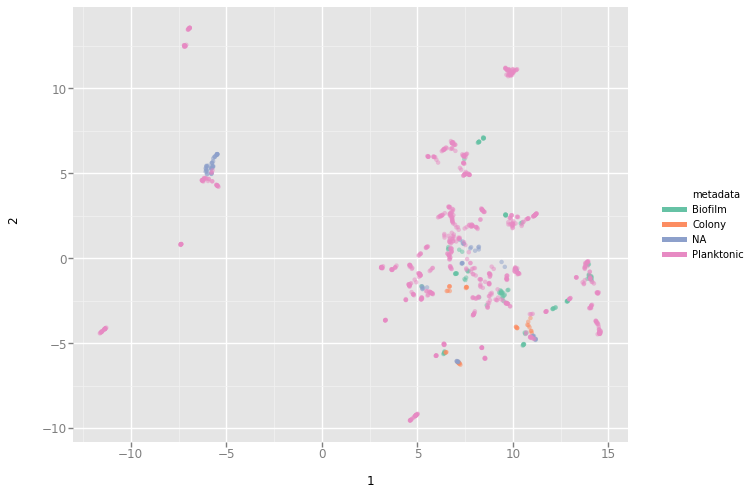

<ggplot: (-9223363266373711935)>

In [12]:
# Plot
ggplot(aes(x='1',y='2', color='metadata'), data=embedding_df) + \
        geom_point(alpha=0.5) + \
        scale_color_brewer(type='qual', palette='Set2')
#ggMarginal(fig, type='histogram')

## Plot 0-1 normalized data

In [13]:
normalized_data_labeled = normalized_data.merge(metadata_selected_labeled, left_index=True, right_index=True, how='inner')
print(normalized_data_labeled.shape)
normalized_data_labeled.head(5)

(989, 5550)


,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,growth_setting_1
05_PA14000-4-2_5-10-07_S2.CEL,0.853357,0.725280,0.640617,0.811465,0.694460,0.533958,0.158865,0.889579,0.884945,0.176558,...,0.702785,0.790965,0.893249,0.789939,0.164157,0.970470,0.887472,0.900484,0.880012,Planktonic
54375-4-05.CEL,0.778790,0.767873,0.614859,0.907865,0.398800,0.460849,0.113876,0.761351,0.801740,0.222709,...,0.694387,0.733186,0.639074,0.681204,0.110301,0.619554,0.747656,0.749893,0.805374,Planktonic
AKGlu_plus_nt_7-8-09_s1.CEL,0.789155,0.729508,0.725913,0.718989,0.530160,0.466327,0.079507,0.731643,0.827707,0.241847,...,0.700352,0.773422,0.791118,0.931585,0.172570,0.797148,0.753785,0.856253,0.811099,Planktonic
DB1.CEL,0.256216,0.461307,0.396341,0.430438,0.398933,0.379887,0.652586,0.569757,0.375272,0.225683,...,0.538515,0.572184,0.568535,0.556461,0.623840,0.970830,0.503223,0.692651,0.386309,Biofilm
DB3.CEL,0.320985,0.452921,0.231726,0.447838,0.335848,0.379614,0.252038,0.518413,0.441566,0.186477,...,0.544428,0.502996,0.429489,0.278100,0.541859,0.860111,0.533048,0.604709,0.433888,Biofilm


In [14]:
# UMAP embedding of raw gene space data
embedding_normalized = umap.UMAP().fit_transform(normalized_data_labeled.iloc[:,1:-1])
embedding_normalized_df = pd.DataFrame(data=embedding_normalized, columns=['1','2'])
embedding_normalized_df['metadata'] = list(normalized_data_labeled[metadata_field])
print(embedding_normalized_df.shape)
embedding_normalized_df.head(5)

/home/alexandra/anaconda3/envs/Pa/lib/python3.5/site-packages/umap/spectral.py:229: UserWarning: Embedding 4 connected components using meta-embedding (experimental)
  n_components


(989, 3)


,1,2,metadata
0,11.566750,4.447729,Planktonic
1,6.942074,3.429366,Planktonic
2,11.598930,4.423634,Planktonic
3,6.290447,-0.394043,Biofilm
4,6.349319,-0.439417,Biofilm


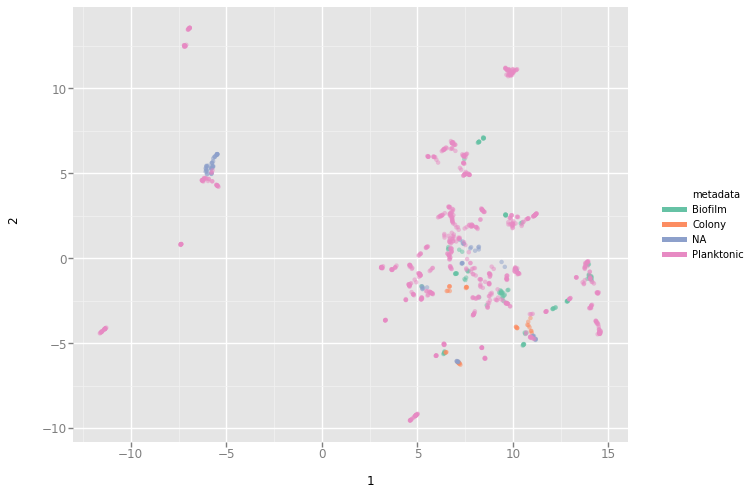

<ggplot: (8770448185892)>

In [15]:
# Plot
ggplot(aes(x='1',y='2', color='metadata'), data=embedding_df) + \
    geom_point(alpha=0.5) + \
    scale_color_brewer(type='qual', palette='Set2')